## **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

**NÚMERO DE EQUIPO:**
* Equipo #83

---        
        
**MIEMBROS DEL EQUIPO:**
* Ernesto Damián Favela Vela: A00738581
* Gustavo Alejandro Garduño Macedo: A01795341
* Julia Gabriela Pinedo: A01795315
* Juan Manuel Rodríguez Mateos: A01794890

--- 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# data_df = pd.read_csv('../data/data.csv')
data_df = pd.read_csv(r'../notebooks/data.csv')
data_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [120]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [121]:
# Estadísticas descriptivas para todas las variables
print("Estadísticas descriptivas para todas las variables:")
print(data_df.describe())

Estadísticas descriptivas para todas las variables:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.0193

1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [122]:
# Para los valores únicos por variable para identificar posibles variables categóricas se realiza lo soguiente:
print("Valores únicos por variable:")
print(data_df.nunique())

Valores únicos por variable:
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int

1c) Búsqueda de valores faltantes.

In [123]:
missing_values = data_df.isnull().sum()

# Imprimir los resultados
print("Valores faltantes por variable:")
print(missing_values)

Valores faltantes por variable:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

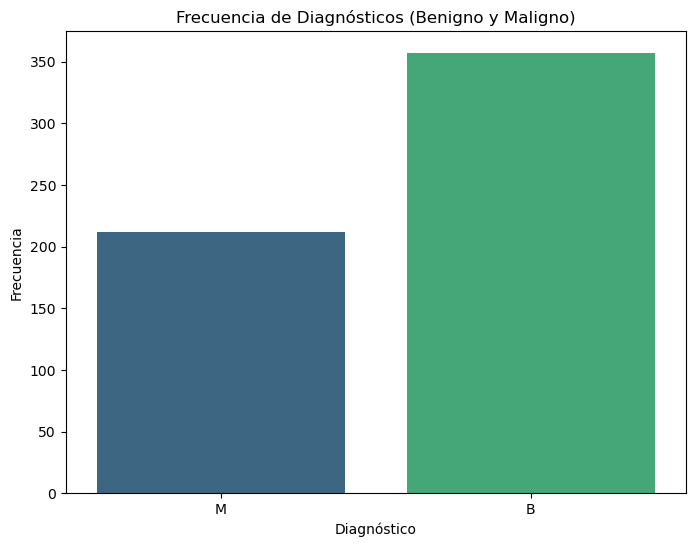

In [124]:
diagnosis_counts = data_df['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data_df, palette='viridis')

plt.title('Frecuencia de Diagnósticos (Benigno y Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

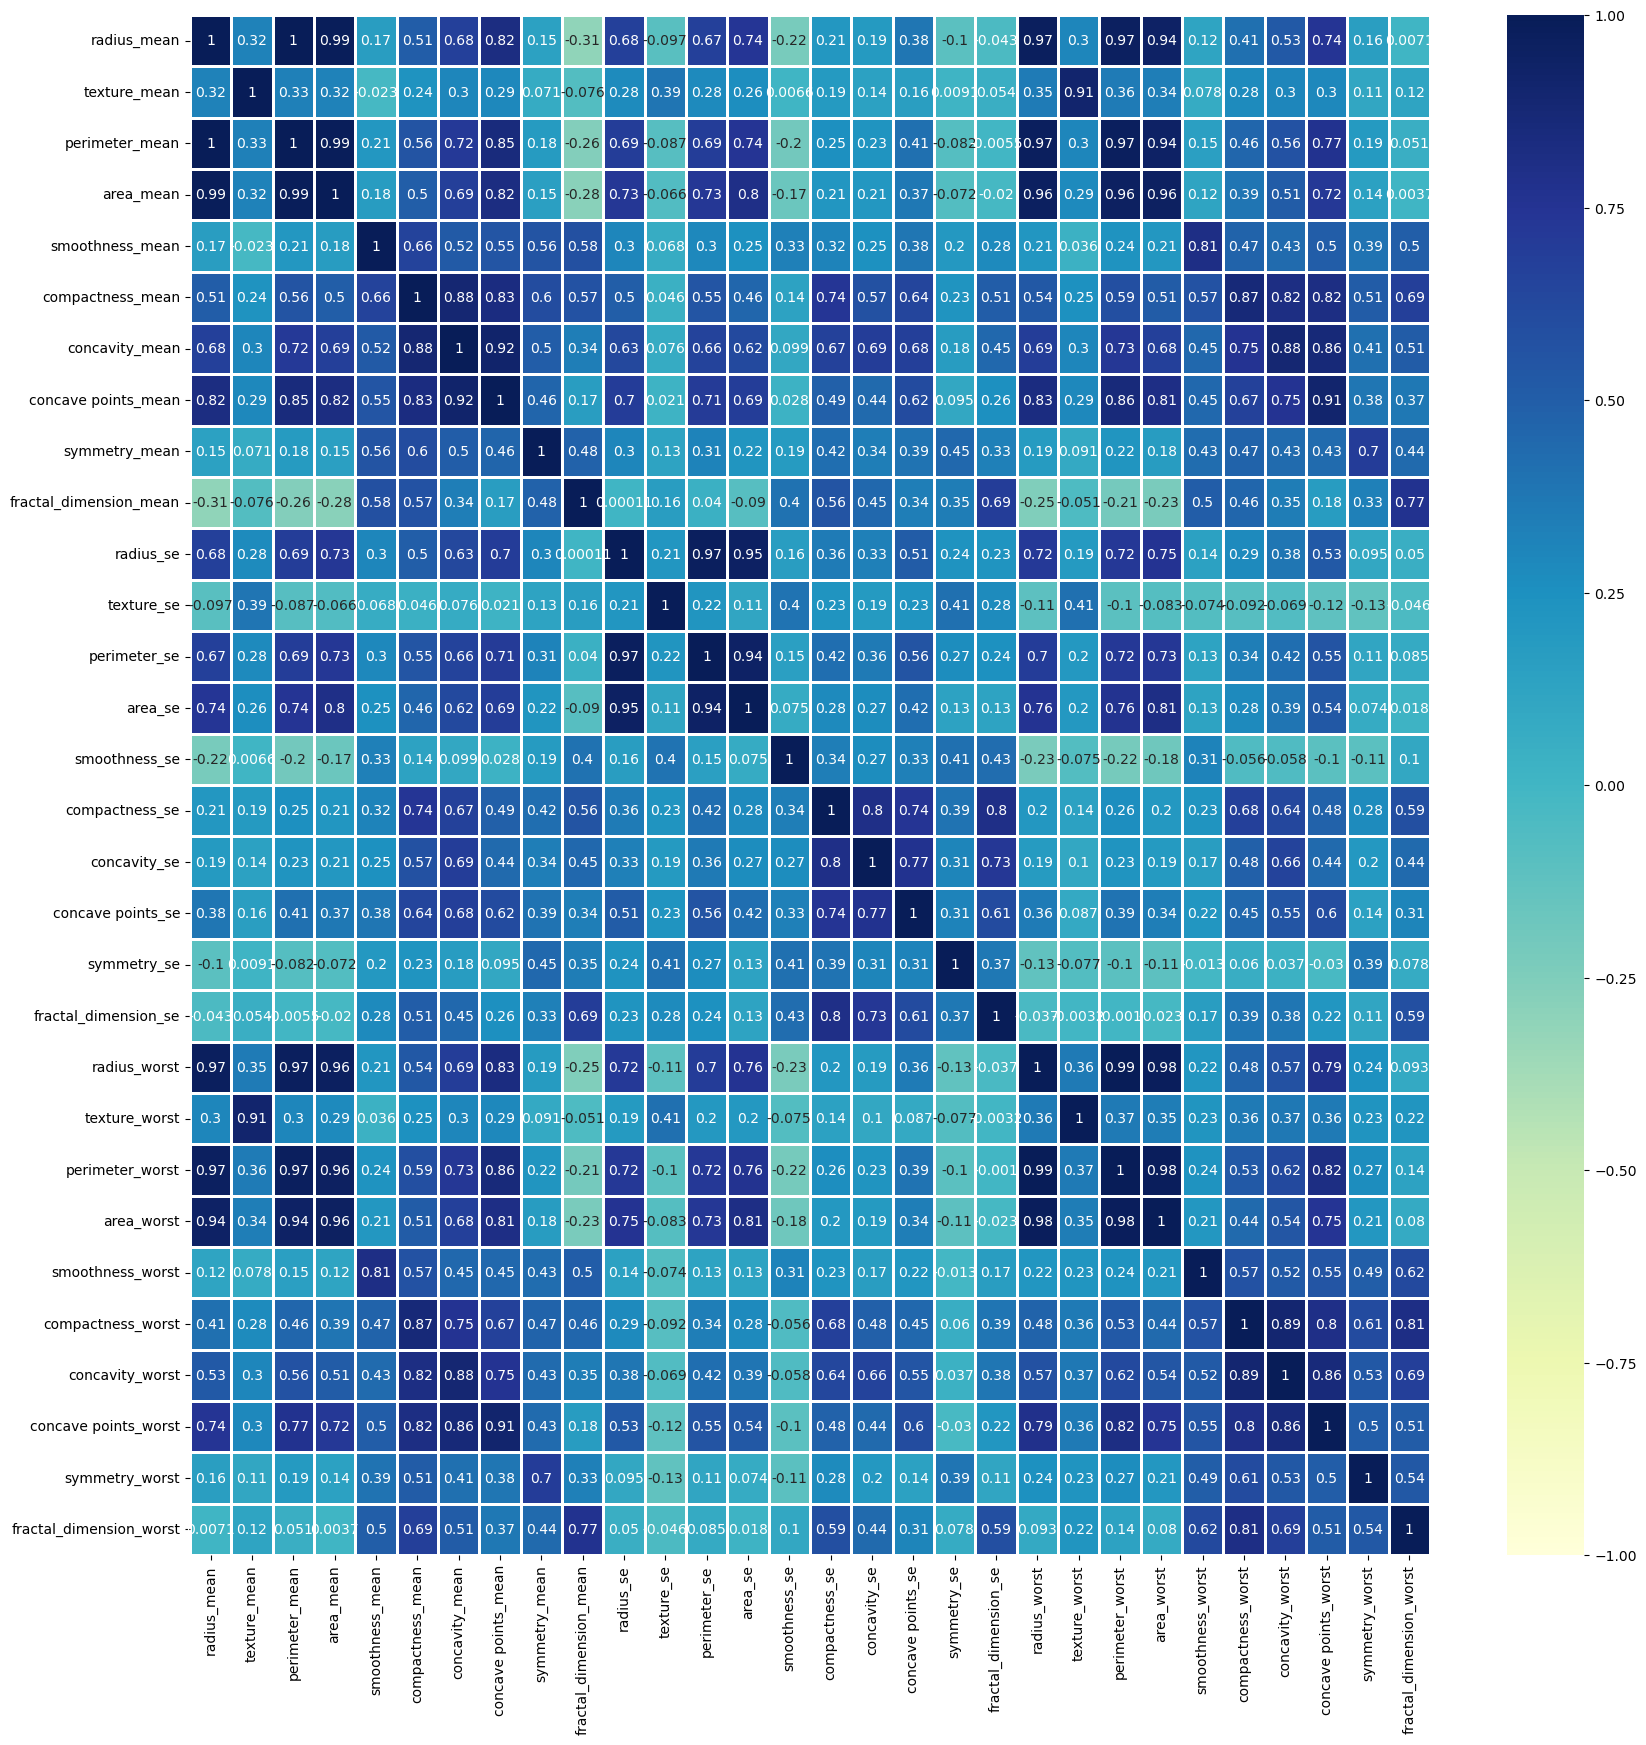

In [125]:

numeric_columns = data_df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu",
            vmin=-1, vmax=1, linewidths=.8, fmt='.2g')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

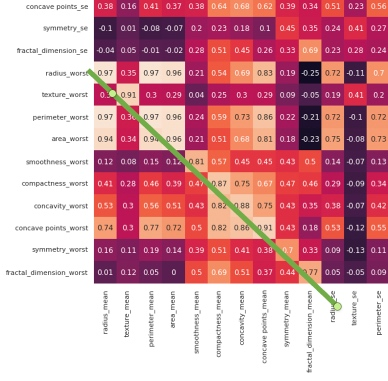

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [126]:
data_df_filtered = data_df.drop(data_df.filter(regex='_worst').columns, axis=1)

In [127]:
data_df_filtered.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [128]:
data_df_filtered.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_se  texture_se  \
id                                            ...                          
842302                0.14710         0.2419  ...     1.0950      0.9053   
842517                0.07017         0.1812  ...     0.5435      0.7339   
84300903              0.12790         0.2069  ...     0.7456      0.7869   
84348301              0.10520         0.2597  ...     0.4956      1.1560   
84358402              0.10430         0.1809  ...     0.7572      0.7813   

          perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
id                                                                             
842302           8.589   153.40       0.006399         0.04904       0.05373   
842517           3.398    74.08       0.005225         0.01308       0.01860   
84300903         4.585    94.03       0.006150         0.04006       0.03832   
84348301         3.445    27.23       0.009110         0.07458       0.05661   
84358402         5.438    94.44       0.011490         0.02461       0.05688   

          concave points_se  symmetry_se  fractal_dimension_se  
id                                                              
842302              0.01587      0.03003              0.006193  
842517              0.01340      0.01389              0.003532  
84300903            0.02058      0.02250              0.004571  
84348301            0.01867      0.05963              0.009208  
84358402            0.01885      0.01756              0.005115  

[5 rows x 21 columns]

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


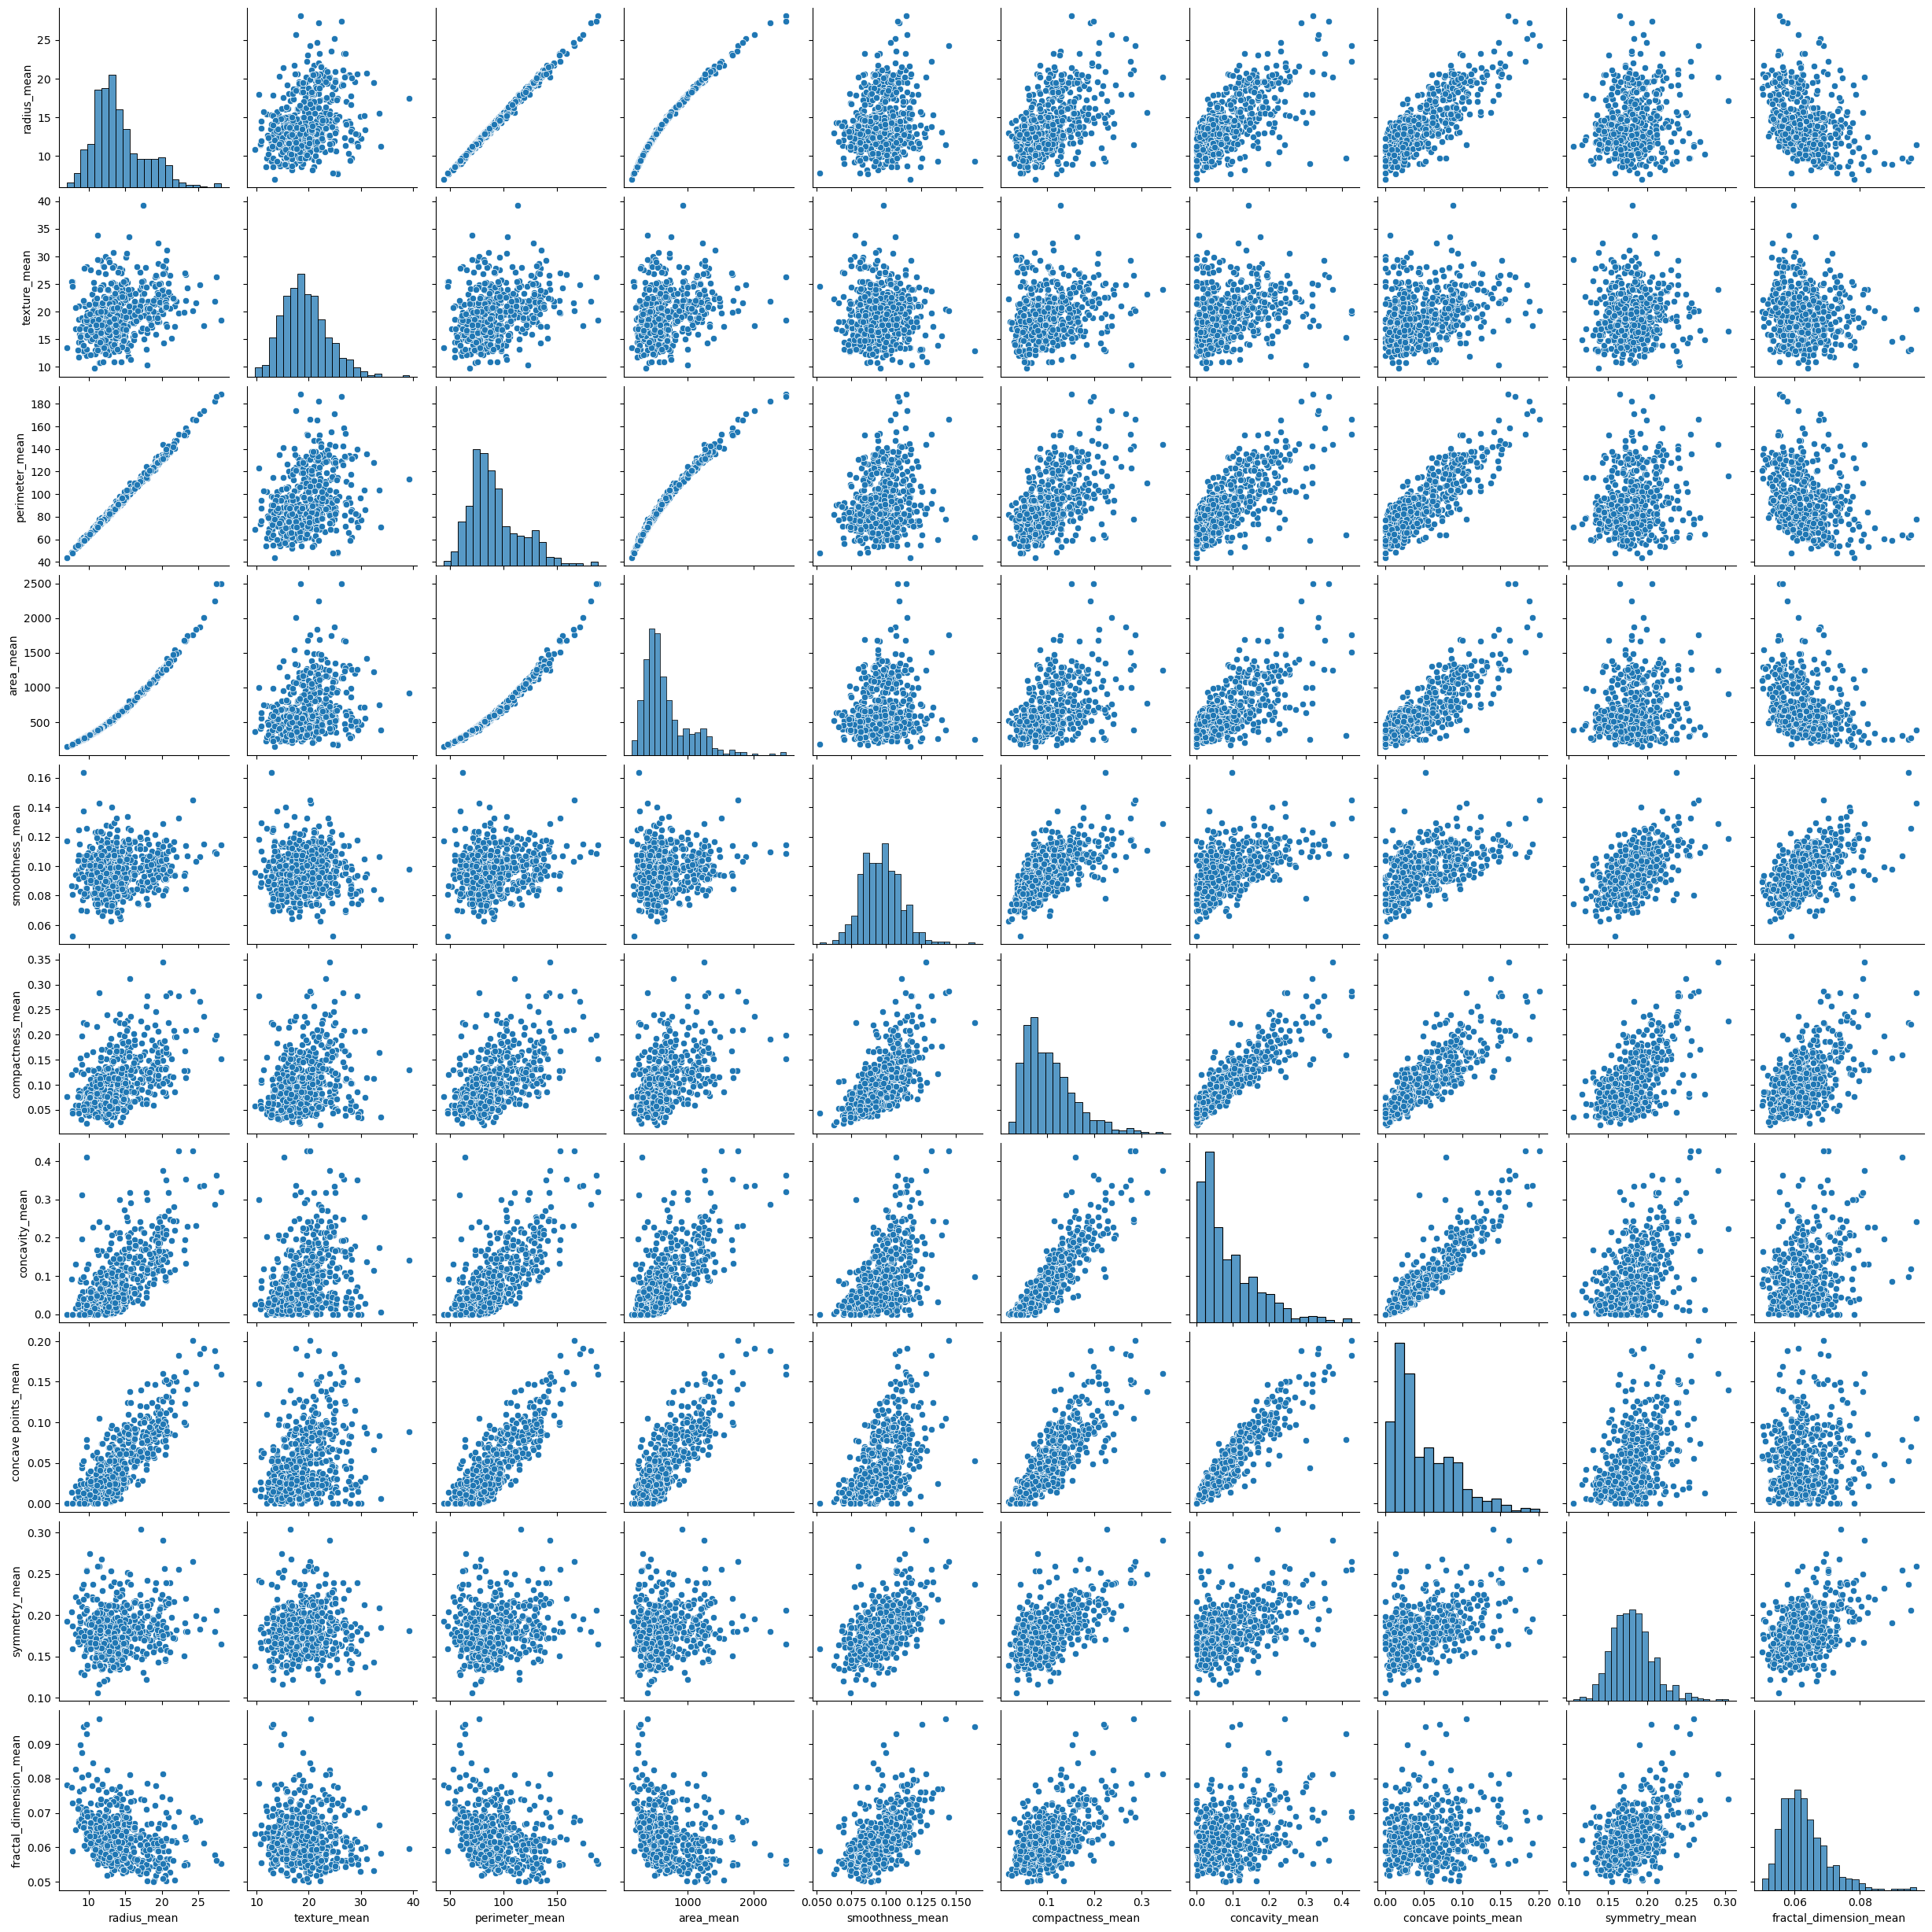

In [129]:
sns.pairplot(data=data_df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]) 

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


<Axes: >

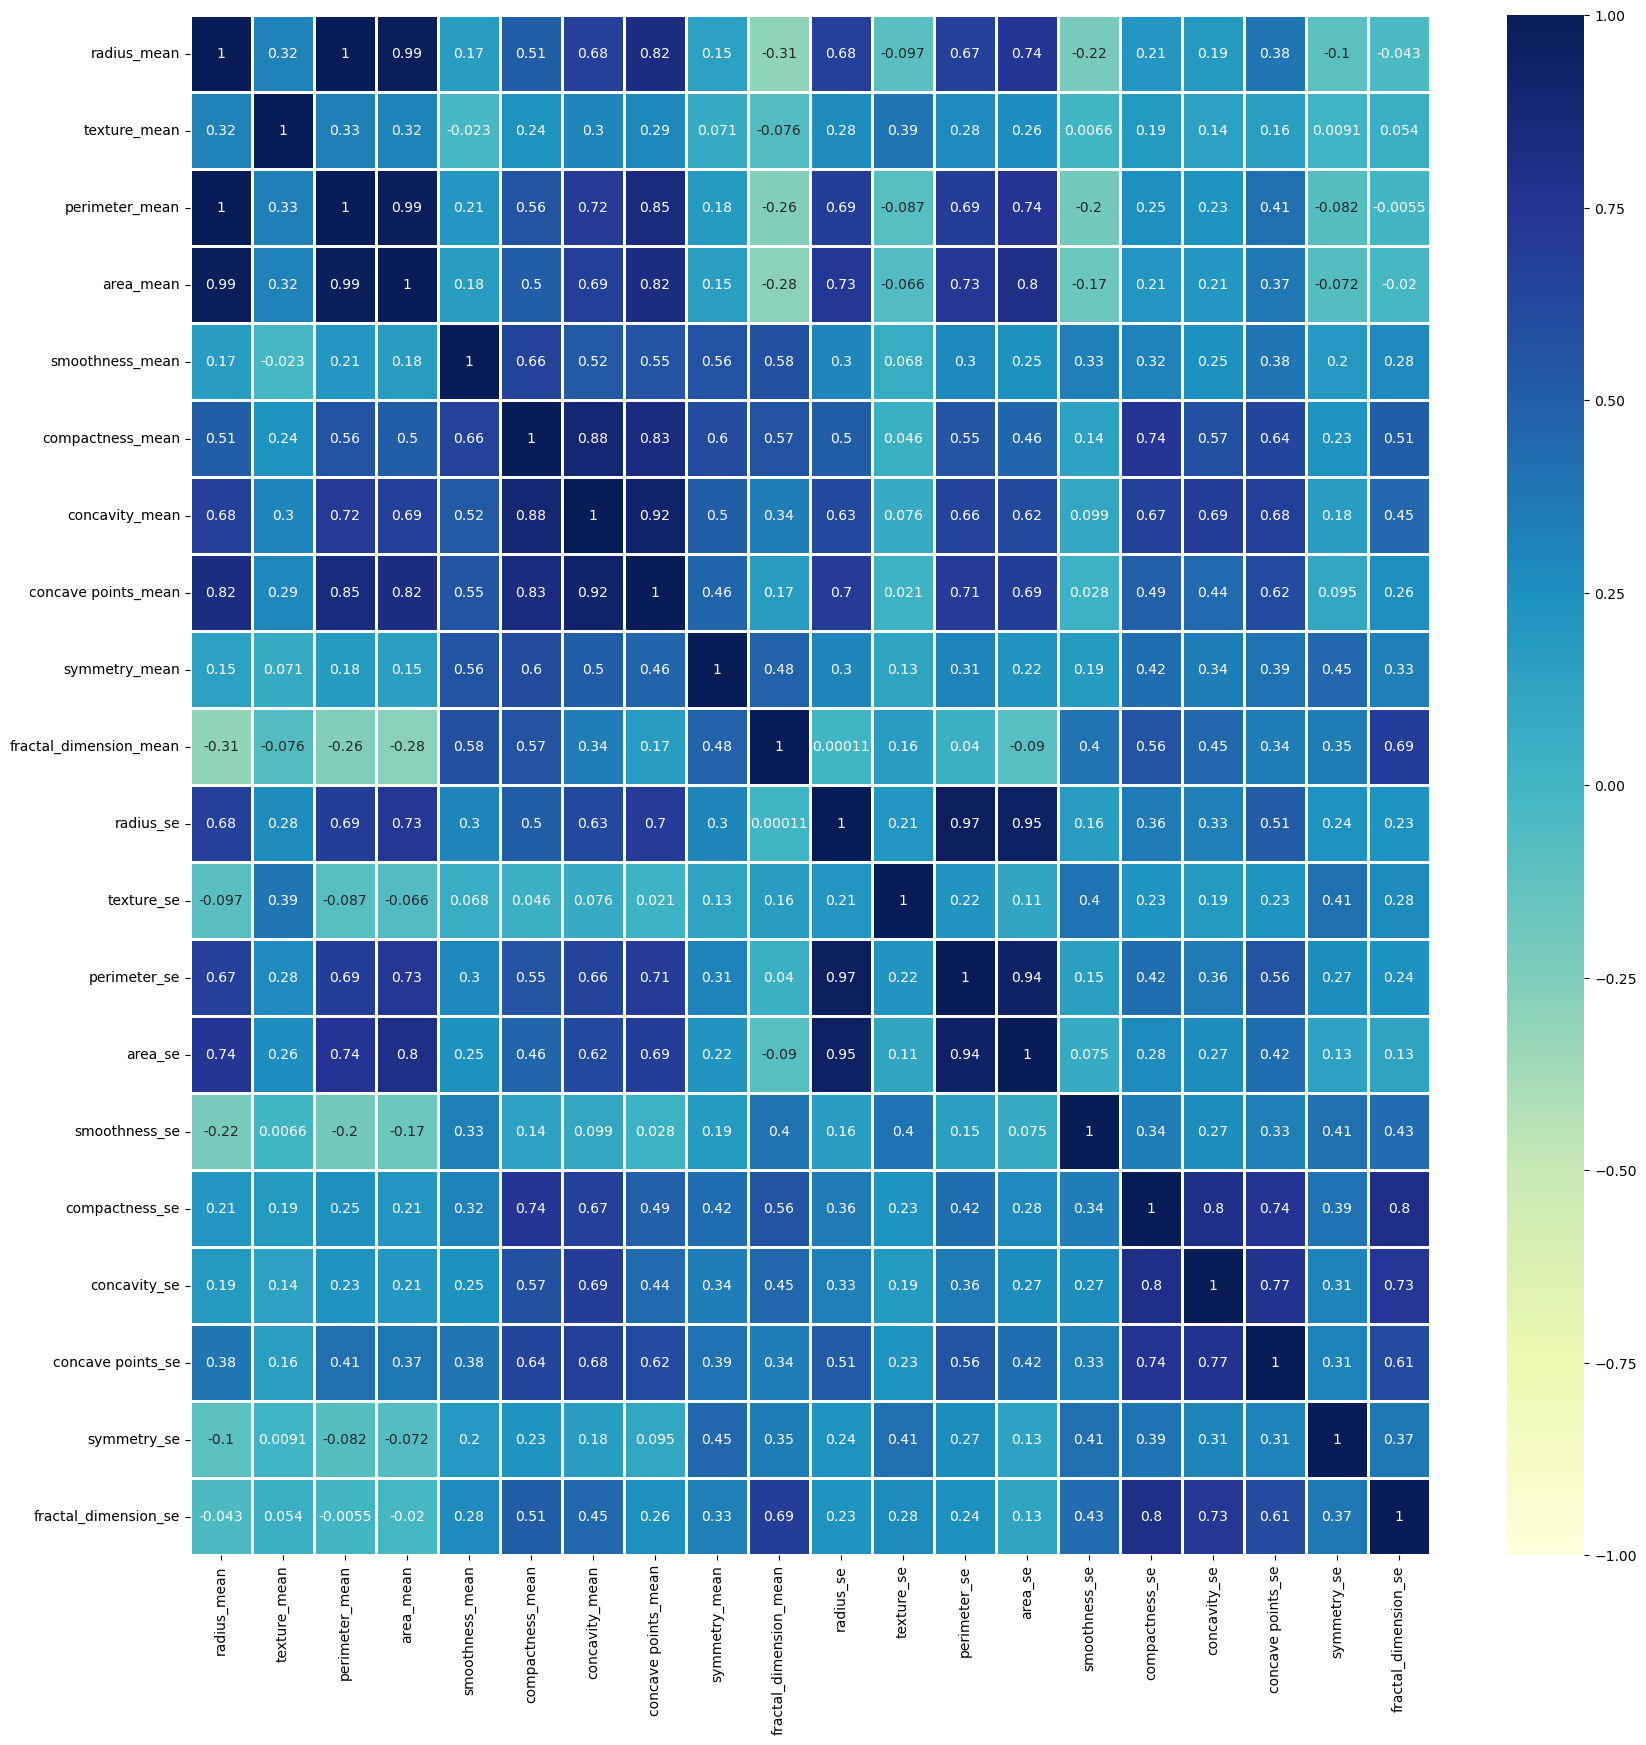

In [130]:
numeric_columns = data_df_filtered.select_dtypes(include=np.number)

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu",
            vmin=-1, vmax=1, linewidths=.8, fmt='.2g')

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [131]:
# Elimina las variables que comiencen con la expresión regular 'perimeter', 'area','concavity', 'concave points'.

# Definir una lista con los valores que hay que filtrar

filtered_list = ['perimeter', 'area', 'concavity', 'concave points']

# Definir un regex para filtrar las columnas que contengan esas palabras

filtered_cols = data_df_filtered.filter(regex=f'({"|".join(filtered_list)})')

# Imprimir las etiquetas de las columnas que se eliminarán

cols_to_drop = filtered_cols.columns
print(cols_to_drop)

# Eliminar columnas e imprimir el DF resultante

data_df_filtered.drop(columns=cols_to_drop, inplace=True)
data_df_filtered

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'],
      dtype='object')


diagnosis  radius_mean  texture_mean  smoothness_mean  \
id                                                               
842302           M        17.99         10.38          0.11840   
842517           M        20.57         17.77          0.08474   
84300903         M        19.69         21.25          0.10960   
84348301         M        11.42         20.38          0.14250   
84358402         M        20.29         14.34          0.10030   
...            ...          ...           ...              ...   
926424           M        21.56         22.39          0.11100   
926682           M        20.13         28.25          0.09780   
926954           M        16.60         28.08          0.08455   
927241           M        20.60         29.33          0.11780   
92751            B         7.76         24.54          0.05263   

          compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
id                                                                             
842302             0.27760         0.2419                 0.07871     1.0950   
842517             0.07864         0.1812                 0.05667     0.5435   
84300903           0.15990         0.2069                 0.05999     0.7456   
84348301           0.28390         0.2597                 0.09744     0.4956   
84358402           0.13280         0.1809                 0.05883     0.7572   
...                    ...            ...                     ...        ...   
926424             0.11590         0.1726                 0.05623     1.1760   
926682             0.10340         0.1752                 0.05533     0.7655   
926954             0.10230         0.1590                 0.05648     0.4564   
927241             0.27700         0.2397                 0.07016     0.7260   
92751              0.04362         0.1587                 0.05884     0.3857   

          texture_se  smoothness_se  compactness_se  symmetry_se  \
id                                                                 
842302        0.9053       0.006399         0.04904      0.03003   
842517        0.7339       0.005225         0.01308      0.01389   
84300903      0.7869       0.006150         0.04006      0.02250   
84348301      1.1560       0.009110         0.07458      0.05963   
84358402      0.7813       0.011490         0.02461      0.01756   
...              ...            ...             ...          ...   
926424        1.2560       0.010300         0.02891      0.01114   
926682        2.4630       0.005769         0.02423      0.01898   
926954        1.0750       0.005903         0.03731      0.01318   
927241        1.5950       0.006522         0.06158      0.02324   
92751         1.4280       0.007189         0.00466      0.02676   

          fractal_dimension_se  
id                              
842302                0.006193  
842517                0.003532  
84300903              0.004571  
84348301              0.009208  
84358402              0.005115  
...                        ...  
926424                0.004239  
926682                0.002498  
926954                0.003892  
927241                0.006185  
92751                 0.002783  

[569 rows x 13 columns]

Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

In [132]:
def print_histogram_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de los histogramas y boxplots
    """      
    # Crear una figura con dos subplots
    fig, ax = plt.subplots()
    
    # Calcular la moda, mediana y media de cada columna
    mode_hist = df[column_name].mode() 
    median_hist = df[column_name].median()
    mean_hist = df[column_name].mean()

    # Graficar el histograma en el primer subplot
    sns.histplot(data=df, x=column_name, ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Histograma de la columna "{column_name}"')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Mostrar moda
    ax.axvline(mode_hist[0], color='green', linestyle='--', linewidth=2, label='Moda')
    # Mostrar mediana
    ax.axvline(median_hist, color='red', linestyle='-', linewidth=2, label='Mediana')
    # Mostrar media
    ax.axvline(mean_hist, color='blue', linestyle='--', linewidth=2, label='Media')
    ax.legend()

    # Ajustar espacio
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()

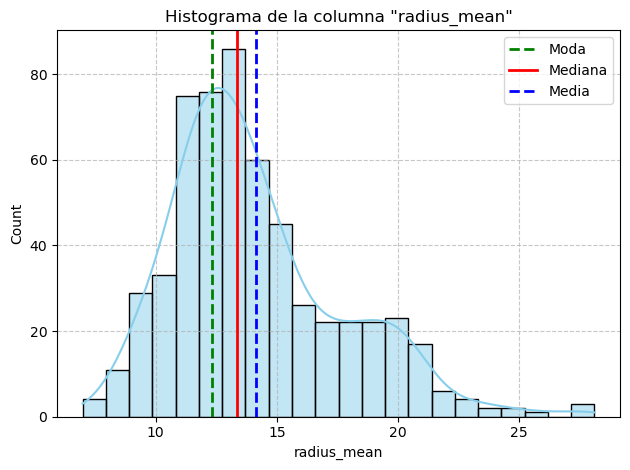

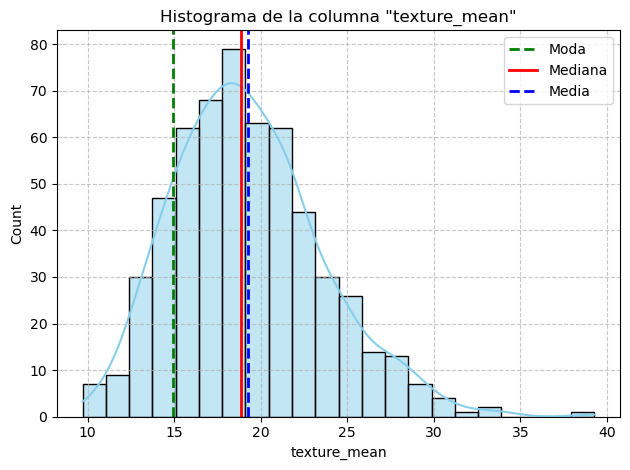

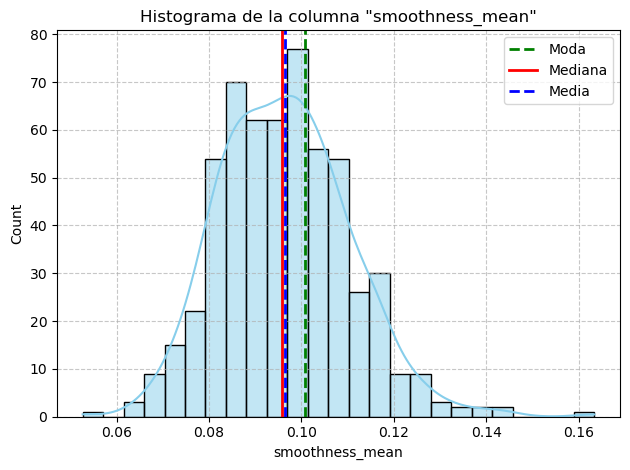

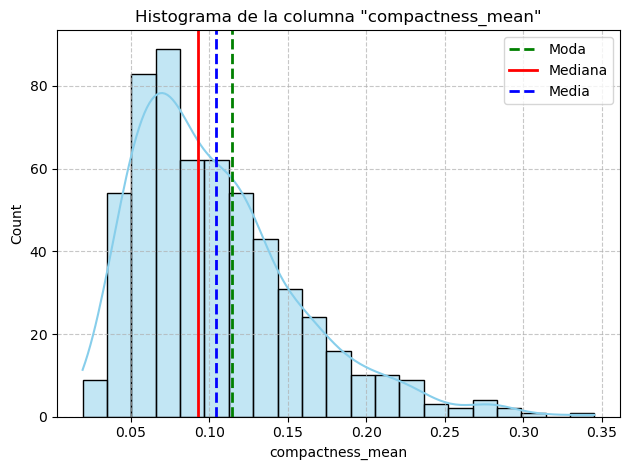

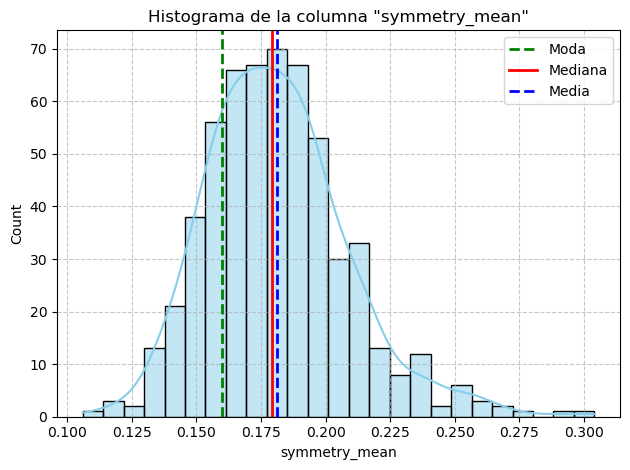

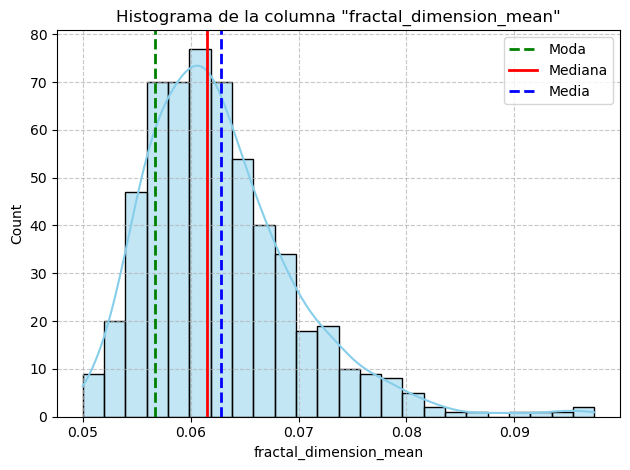

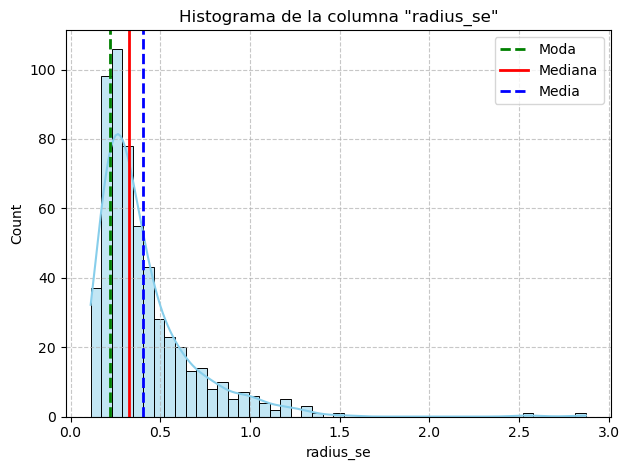

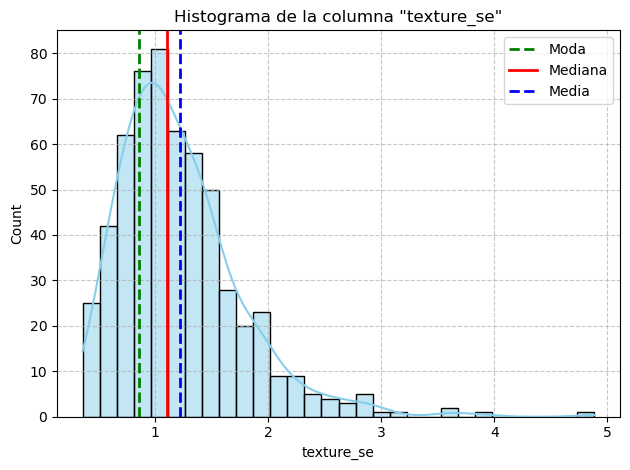

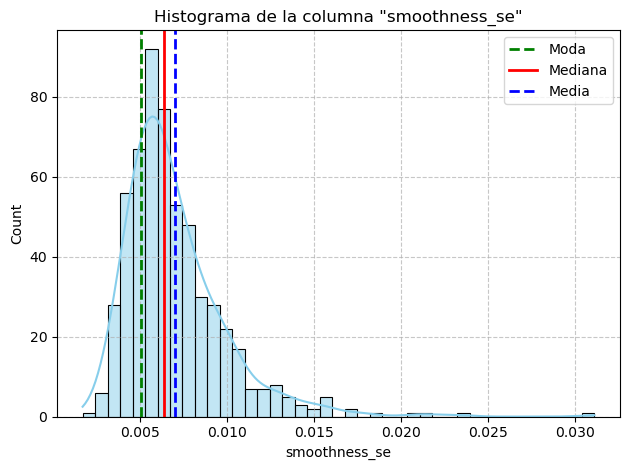

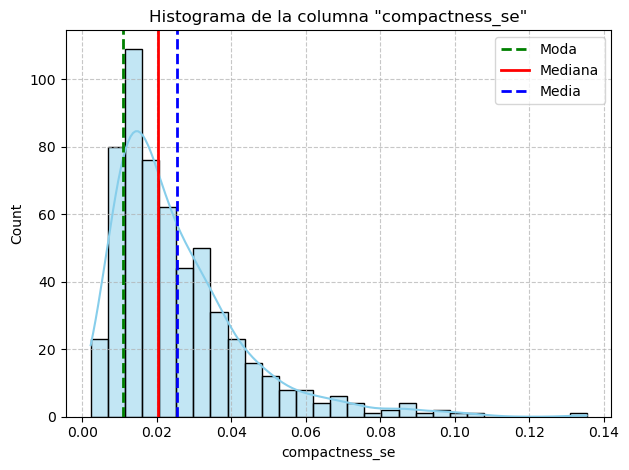

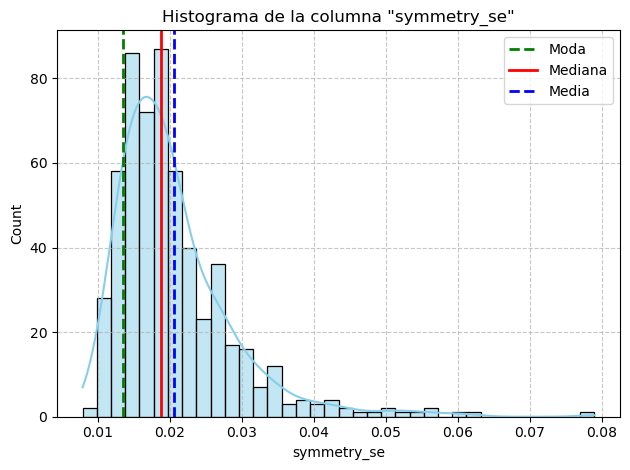

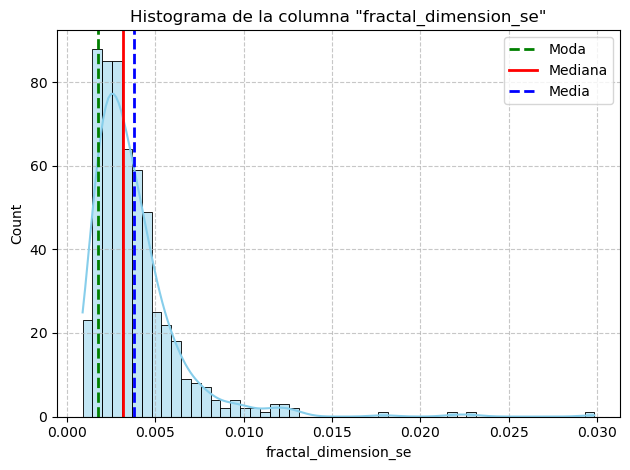

In [133]:
num_columns_after_drop = data_df_filtered.select_dtypes(include=['int', 'float']).columns

for column_name in num_columns_after_drop:
    print('\n')
    print_histogram_per_column(df=data_df_filtered, column_name=column_name)

- Al observar las columnas, es posible determinar que: `compactness_mean`, `fractal_dimension_mean`, `radius_se`, `texture_se`, `smoothness_se`, `compactness_se`, `symmetry_se` y `fractal_dimension_se` tienen sesgo positivo. Sin embargo, se imprimirá la asimetría por columnas para comprobar los resultados.

In [134]:
# 'True' para obtenerlo únicamente para columnas numéricas
skewness = data_df_filtered.skew(numeric_only=True)

# Se crea un dataframe a partir de los valores obtenidos, nombrando la columna como
# asimetría
skewness_df = pd.DataFrame({'asimetria': skewness})
skewness_df

asimetria
radius_mean              0.942380
texture_mean             0.650450
smoothness_mean          0.456324
compactness_mean         1.190123
symmetry_mean            0.725609
fractal_dimension_mean   1.304489
radius_se                3.088612
texture_se               1.646444
smoothness_se            2.314450
compactness_se           1.902221
symmetry_se              2.195133
fractal_dimension_se     3.923969

In [135]:
# Por lo tanto, se pueden filtrar las columnas que cumplen la condición anteriormente
# señalada. 

skew_cols = skewness[skewness > 1].index.tolist()
print(skew_cols)

['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


In [136]:
def print_boxplot_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de los histogramas y boxplots
    """      
    # Crear una figura con dos subplots
    fig, ax = plt.subplots()
    
    # Graficar el boxplot en el segundo subplot
    sns.boxplot(data=df, x=column_name, ax=ax, color='blue', showmeans=True)
    ax.set_title(f'Boxplot de la columna "{column_name}"')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Ajustar espacio
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()

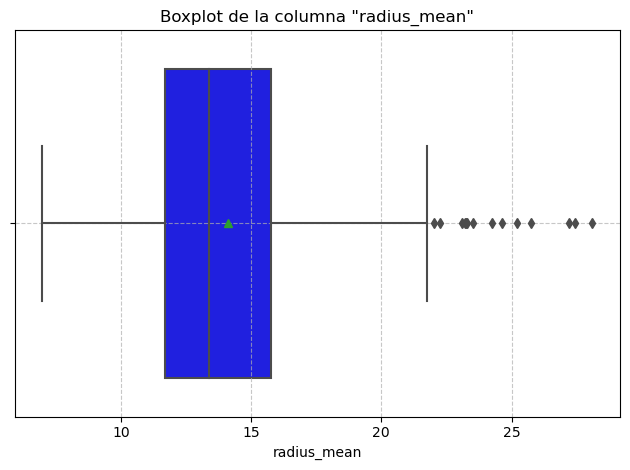

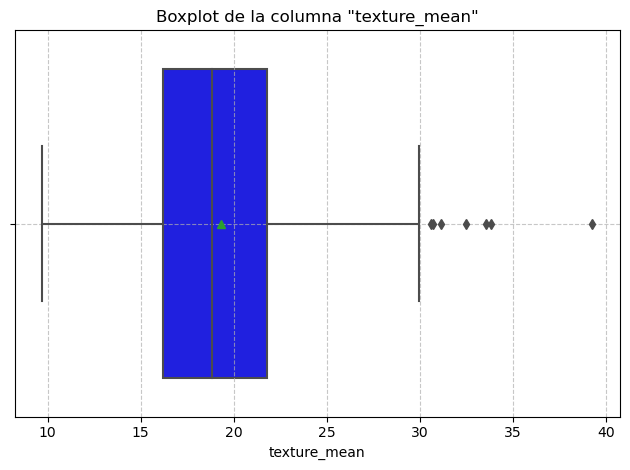

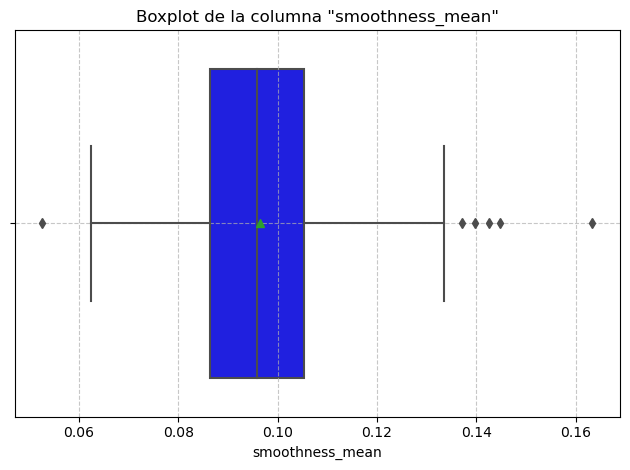

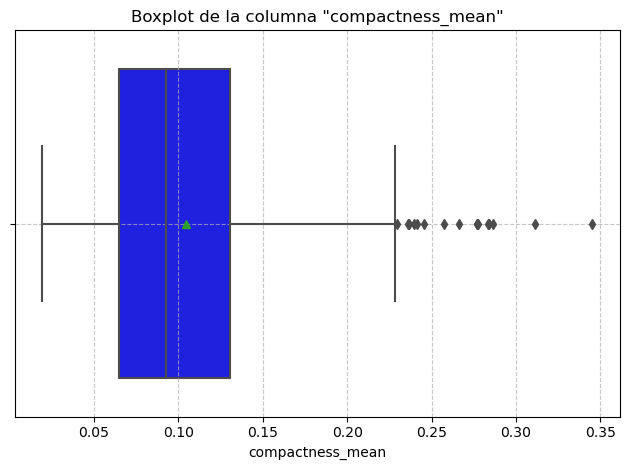

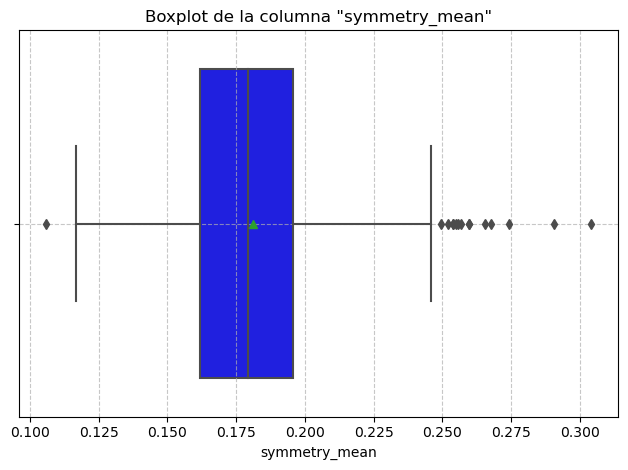

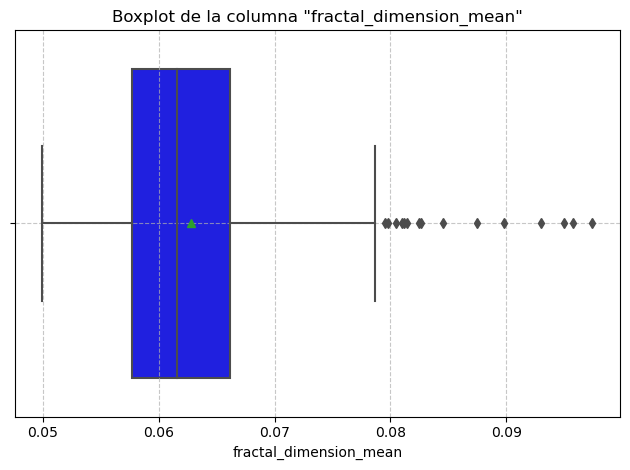

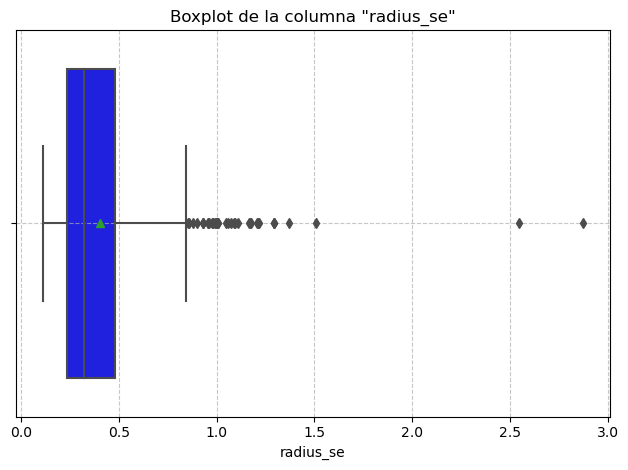

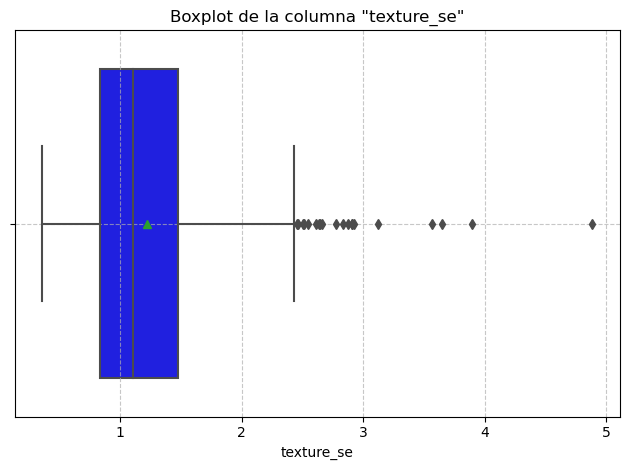

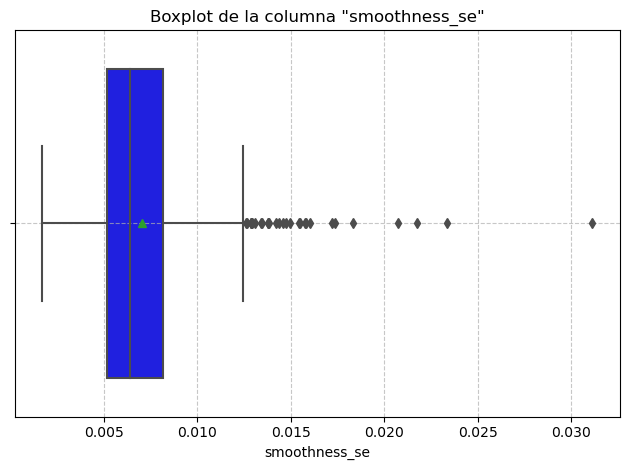

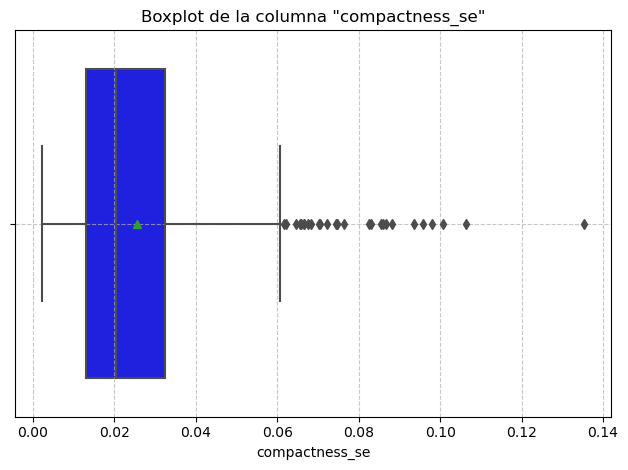

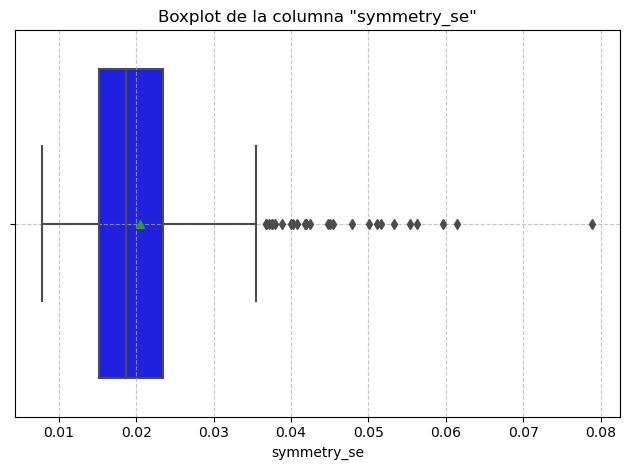

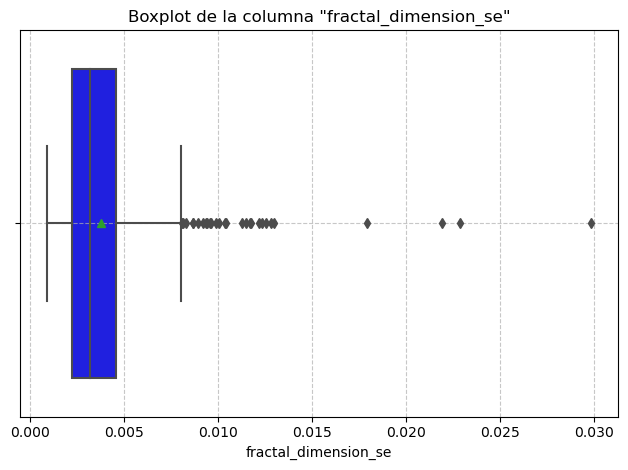

In [137]:
for column_name in num_columns_after_drop:
    print('\n')
    print_boxplot_per_column(df=data_df_filtered, column_name=column_name)

- Es posible identificar que las columnas: radius_mean, texture_mean, radius_se y texture_se se encuentran fuera del rango establecido. Sin embargo, para respaldar la información, se llevará un cálculo numérico para obtener los valores de las variables.

In [138]:
# Se declara una lista para guardar las etiquetas obtenidas
scale_cols = []

for column_name in num_columns_after_drop:
    if any((data_df_filtered[column_name] < 0) | (data_df_filtered[column_name] > 1)):
        scale_cols.append(column_name)
        
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [139]:
# Leer de nuevo el DataFrame

# data_df = pd.read_csv('../data/data.csv')
data_df = pd.read_csv(r'../notebooks/data.csv')

# Cambiar el índice del DataFrame

data_df.set_index('id', inplace=True)

# Comprobar la operación

data_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [140]:
worst_columns = data_df.filter(regex='_worst').columns

unique_cols_to_drop = set(cols_to_drop.to_list() + worst_columns.tolist())
print(unique_cols_to_drop)

{'concave points_mean', 'perimeter_se', 'perimeter_mean', 'concavity_se', 'area_worst', 'concave points_worst', 'concavity_worst', 'smoothness_worst', 'concavity_mean', 'symmetry_worst', 'area_se', 'concave points_se', 'fractal_dimension_worst', 'perimeter_worst', 'compactness_worst', 'texture_worst', 'area_mean', 'radius_worst'}


In [141]:
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessing(BaseEstimator, TransformerMixin):

    def __init__(self, cols_to_drop):
        self.cols_to_drop = cols_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.cols_to_drop)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Definir el pipeline

pipeline = Pipeline(steps=[
    ('preprocessing', Preprocessing(cols_to_drop=unique_cols_to_drop)),
    ('logistic_regression', LogisticRegression())
])

# Separar la matriz de features y el vector objetivo

X = data_df.drop(columns=['diagnosis'])

y = data_df['diagnosis']

# Separar los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Entrenar el modelo

pipeline.fit(X_train, y_train)

# Predecir valores para los datos de prueba

y_pred = pipeline.predict(X_test)

# Obtener métricas de evaluación

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label="M")}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label="M")}')
print(f'F1: {f1_score(y_test, y_pred, pos_label="M")}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9210526315789473
Precision: 1.0
Recall: 0.7804878048780488
F1: 0.8767123287671234
Confusion Matrix: 
[[73  0]
 [ 9 32]]
Classification Report: 
              precision    recall  f1-score   support

           B       0.89      1.00      0.94        73
           M       1.00      0.78      0.88        41

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [143]:

from sklearn.preprocessing import MinMaxScaler

class Preprocessing(BaseEstimator, TransformerMixin):

    def __init__(self, cols_to_drop, sqrt_cols, minmax_cols):
        self.cols_to_drop = cols_to_drop
        self.sqrt_cols = sqrt_cols
        self.minmax_cols = minmax_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.drop(columns=self.cols_to_drop)
        X[self.sqrt_cols] = np.sqrt(X[self.sqrt_cols])
        X[self.minmax_cols] = MinMaxScaler().fit_transform(X[self.minmax_cols])
        return X

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [144]:
# Definir el pipeline

pipeline = Pipeline(steps=[
    ('preprocessing', Preprocessing(cols_to_drop=cols_to_drop, sqrt_cols=skew_cols, minmax_cols=scale_cols)),
    ('logistic_regression', LogisticRegression())
])

# Entrenar el modelo

pipeline.fit(X_train, y_train)

# Predecir valores para los datos de prueba

y_pred = pipeline.predict(X_test)

# Obtener métricas de evaluación

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label="M")}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label="M")}')
print(f'F1: {f1_score(y_test, y_pred, pos_label="M")}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.926829268292683
F1: 0.9620253164556963
Confusion Matrix: 
[[73  0]
 [ 3 38]]
Classification Report: 
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        73
           M       1.00      0.93      0.96        41

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [145]:
# Importar Librerías
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Declarar objeto
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [146]:
# Se guardan los valores del array en un DataFrame para observar el escalamiento de cada uno de
# los componentes en "X"

x_scaled = pd.DataFrame(x_scaled, columns=scaler.get_feature_names_out())
x_scaled

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [147]:
# Importar Librerías
from sklearn.decomposition import PCA

pca = PCA() # Declarar objeto
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected

0          1         2         3         4         5         6   \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698952   

           7         8         9   ...        20        21        22  \
0   -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519   
1    0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718   
2    0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291   
3    1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105   
4    0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454   
..        ...       ...       ...  ...       ...       ...       ...   
564 -0.035471  0.987929  0.256989  ...  0.006888 -0.067000  0.088590   
565 -1.113360 -0.105207 -0.108632  ... -0.009802  0.019563 -0.055405   
566  0.341887  0.393917  0.520877  ... -0.036592  0.063352 -0.200312   
567 -0.280239 -0.542035 -0.089296  ...  0.140648 -0.042478  0.168820   
568  1.046354  0.374101 -0.047726  ...  0.274680 -0.243238  0.037915   

           23        24        25        26        27        28        29  
0   -0.175256 -0.151020 -0.201503 -0.252585 -0.033914  0.045648 -0.047169  
1    0.011290 -0.170510 -0.041129  0.181270  0.032624 -0.005687 -0.001868  
2    0.102762  0.171158  0.004735  0.049569  0.047026  0.003146  0.000751  
3    0.153430  0.077496 -0.275225  0.183462  0.042484 -0.069295 -0.019937  
4   -0.005332  0.003062  0.039254  0.032168 -0.034786  0.005038  0.021214  
..        ...       ...       ...       ...       ...       ...       ...  
564  0.107898  0.219520 -0.122900  0.159198  0.009853  0.007119 -0.001415  
565  0.086135  0.001197  0.065889 -0.068512 -0.023575 -0.027486 -0.010419  
566 -0.044819  0.002429  0.007095 -0.023691 -0.002578  0.006706  0.003770  
567 -0.195969  0.377830 -0.198192 -0.027409 -0.068086 -0.084163 -0.023783  
568 -0.075111 -0.017508  0.347115  0.127381 -0.009516 -0.060913 -0.019476  

[569 rows x 30 columns]

In [148]:
# Se pueden obtener los valores propios después de aplicar la matriz de covarianza

print('Los valores propios de la matriz de covarianza de los datos obtenidos son:')
print(list(np.round(pca.explained_variance_, decimals=10)))

Los valores propios de la matriz de covarianza de los datos obtenidos son:
[13.3049907944, 5.7013746037, 2.822910155, 1.9841275177, 1.6516332423, 1.2094822398, 0.6764088817, 0.4774562547, 0.4176287821, 0.3513108749, 0.2944331535, 0.2616211614, 0.2417824213, 0.1572861492, 0.0943006956, 0.0800034045, 0.0595036135, 0.0527114222, 0.0495647002, 0.0312142606, 0.0300256631, 0.0274877113, 0.0243836914, 0.018086794, 0.0155085271, 0.0081920371, 0.0069126126, 0.001592136, 0.0007501214, 0.0001332791]


In [149]:
# Se obtendrán los porcentajes de varianza para su análisis posterior
total_components = X.shape[1]
for i in range(0, total_components):
    print('El porcentaje de varianza en la Componente', i+1, 'es',
          format(pca.explained_variance_ratio_[i]*100,'.10f'),'%')

El porcentaje de varianza en la Componente 1 es 44.2720256075 %
El porcentaje de varianza en la Componente 2 es 18.9711820440 %
El porcentaje de varianza en la Componente 3 es 9.3931632574 %
El porcentaje de varianza en la Componente 4 es 6.6021349155 %
El porcentaje de varianza en la Componente 5 es 5.4957684923 %
El porcentaje de varianza en la Componente 6 es 4.0245220399 %
El porcentaje de varianza en la Componente 7 es 2.2507337130 %
El porcentaje de varianza en la Componente 8 es 1.5887238000 %
El porcentaje de varianza en la Componente 9 es 1.3896493746 %
El porcentaje de varianza en la Componente 10 es 1.1689781894 %
El porcentaje de varianza en la Componente 11 es 0.9797189876 %
El porcentaje de varianza en la Componente 12 es 0.8705379007 %
El porcentaje de varianza en la Componente 13 es 0.8045249872 %
El porcentaje de varianza en la Componente 14 es 0.5233657455 %
El porcentaje de varianza en la Componente 15 es 0.3137832168 %
El porcentaje de varianza en la Componente 16 e

In [150]:
# Adicional: Se construye un DataFrame con los 11 componentes para visualizar los valores

# Se imprimen los vectores propios obtenidos
vectores_propios = pca.components_
print(vectores_propios)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

In [151]:
components_df = pd.DataFrame(abs(vectores_propios[:31]), columns = X.columns, 
                             index=['PC{}'.format(i) for i in range(1, 31)])
components_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2      0.233857      0.059706        0.215181   0.231077         0.186113   
PC3      0.008531      0.064550        0.009314   0.028700         0.104292   
PC4      0.041409      0.603050        0.041983   0.053434         0.159383   
PC5      0.037786      0.049469        0.037375   0.010331         0.365089   
PC6      0.018741      0.032179        0.017308   0.001888         0.286374   
PC7      0.124088      0.011400        0.114477   0.051653         0.140669   
PC8      0.007452      0.130675        0.018687   0.034674         0.288975   
PC9      0.223110      0.112699        0.223739   0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956         0.069293   
PC11     0.041471      0.302243        0.016783   0.110170         0.137022   
PC12     0.051067      0.254896        0.038926   0.065438         0.316727   
PC13     0.011967      0.203461        0.044110   0.067376         0.045574   
PC14     0.059506      0.021560        0.048514   0.010831         0.445065   
PC15     0.051119      0.107922        0.039903   0.013967         0.118143   
PC16     0.150584      0.157842        0.114454   0.132448         0.204613   
PC17     0.202924      0.038706        0.194821   0.255706         0.167930   
PC18     0.146712      0.041103        0.158317   0.266168         0.352227   
PC19     0.225385      0.029789        0.239595   0.027322         0.164566   
PC20     0.049699      0.244135        0.017665   0.090144         0.017101   
PC21     0.068570      0.448369        0.069769   0.018443         0.119492   
PC22     0.072929      0.094801        0.075160   0.097566         0.063823   
PC23     0.098553      0.000555        0.040245   0.007777         0.020666   
PC24     0.182579      0.098787        0.116649   0.069848         0.068697   
PC25     0.019226      0.084746        0.027015   0.210041         0.028955   
PC26     0.129476      0.024557        0.125256   0.362727         0.037004   
PC27     0.131527      0.017357        0.115415   0.466612         0.069690   
PC28     0.211194      0.000066        0.084338   0.272508         0.001479   
PC29     0.211460      0.010534        0.383826   0.422795         0.003435   
PC30     0.702414      0.000274        0.689897   0.032947         0.004847   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC1           0.239285        0.258400             0.260854       0.138167   
PC2           0.151892        0.060165             0.034768       0.190349   
PC3           0.074092        0.002734             0.025564       0.040240   
PC4           0.031795        0.019123             0.065336       0.067125   
PC5           0.011704        0.086375             0.043861       0.305941   
PC6           0.014131        0.009344             0.052050       0.356458   
PC7           0.030918        0.107520             0.150482       0.093891   
PC8           0.151396        0.072827             0.152322       0.231531   
PC9           0.167841        0.040591             0.111971       0.256040   
PC10          0.012936        0.135602             0.008055       0.572069   
PC11          0.308010        0.124190             0.072446       0.163054   
PC12          0.104017        0.065653             0.042589       0.288866   
PC13          0.229281        0.387091             0.132138       0.189934   
PC14          0.008101        0.189359             0.244795       0.030739   
PC15          0.230900        0.128284             0.217099       0.073962   
PC16          0.170178        0.269470             0.380464       0.164662   
PC17          0.020308        0.001598             0.034510       0.191738   
PC18          0.007794        0.026968             0.082828       0.173398   
PC19          0.284222        0.002266             0.154972       0.058811

In [152]:
# Se obtienen las proporciones de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Calculamos el porcentaje de varianza acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Encontramos el número mínimo de componentes para explicar más del 90% de la varianza
num_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

# Imprimimos la información de los componentes principales seleccionados
print(f'El número de componentes principales para explicar más del 99% de la varianza: {num_components_99}')
print(f'\n')
print('Porcentaje de varianza explicada por cada componente principal:')
for i, ratio in enumerate(np.cumsum(explained_variance_ratio[:num_components_99]*100)):
    print(f'Componente {i + 1}: {ratio:.10f}%')

El número de componentes principales para explicar más del 99% de la varianza: 17


Porcentaje de varianza explicada por cada componente principal:
Componente 1: 44.2720256075%
Componente 2: 63.2432076516%
Componente 3: 72.6363709090%
Componente 4: 79.2385058245%
Componente 5: 84.7342743168%
Componente 6: 88.7587963567%
Componente 7: 91.0095300697%
Componente 8: 92.5982538697%
Componente 9: 93.9879032443%
Componente 10: 95.1568814337%
Componente 11: 96.1366004213%
Componente 12: 97.0071383220%
Componente 13: 97.8116633092%
Componente 14: 98.3350290547%
Componente 15: 98.6488122715%
Componente 16: 98.9150216080%
Componente 17: 99.1130184005%


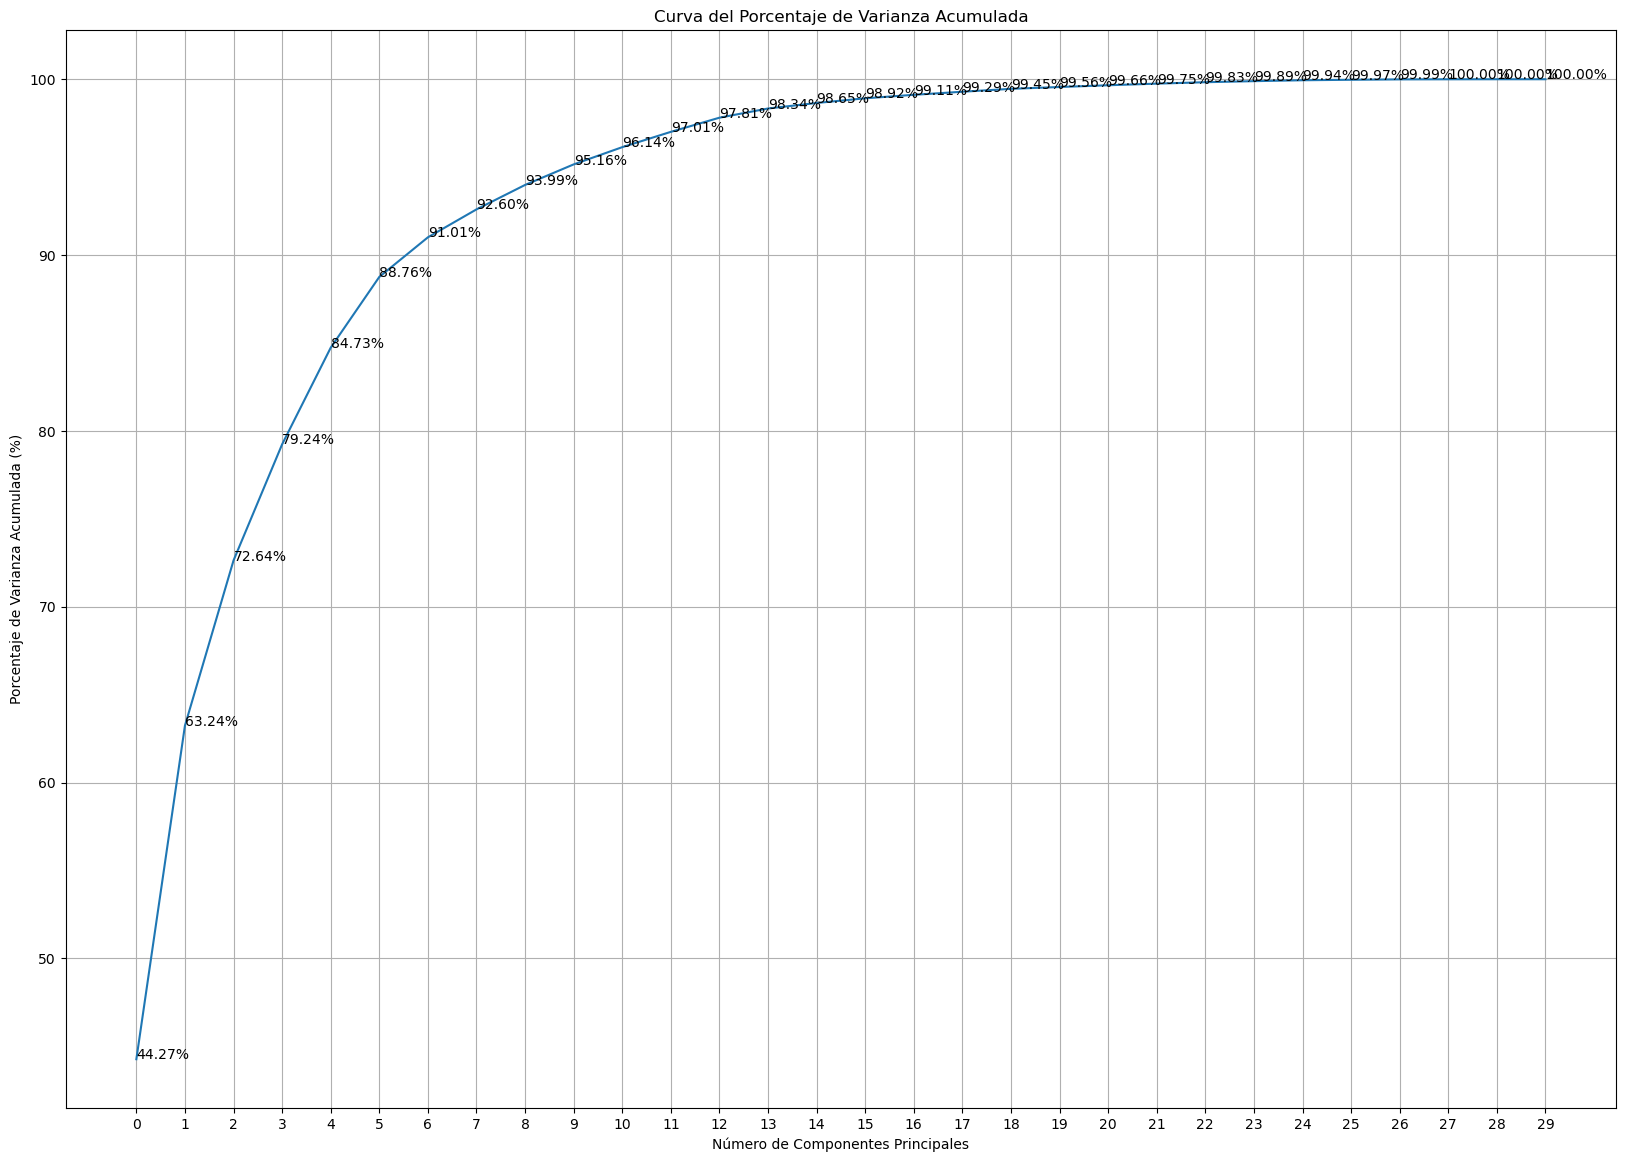

In [153]:
# Para finalizar, generamos la curva del porcentaje de varianza acumulada

plt.figure(figsize=(20, 14))
plt.plot(cumulative_variance_ratio*100)
plt.title('Curva del Porcentaje de Varianza Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Acumulada (%)')
plt.xticks(np.arange(0,total_components,1))
labels = cumulative_variance_ratio*100
           
# Se imprimen los porcentajes en el gráfico
for i in range(total_components):
    plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%')
plt.grid(True)
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [154]:
from sklearn.pipeline import make_pipeline
# Crea un nuevo pipeline (logr_model3) con StandardScaler, PCA y regresión logistica
logr_model3 = make_pipeline( 
    StandardScaler(),
    PCA(),
    LogisticRegression())

# Separar los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Entrenar el modelo

logr_model3.fit(X_train, y_train)

# Predecir valores para los datos de prueba

y_pred = logr_model3.predict(X_test)

# Obtener métricas de evaluación

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, pos_label="M")}')
print(f'Recall: {recall_score(y_test, y_pred, pos_label="M")}')
print(f'F1: {f1_score(y_test, y_pred, pos_label="M")}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.975609756097561
F1: 0.9876543209876543
Confusion Matrix: 
[[73  0]
 [ 1 40]]
Classification Report: 
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        73
           M       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

En un modelo de diagnóstico médico la métrica más importante es Recall, ya que es la métrica que muestra la relación entre los resultados positivos verdaderos (VP) y los resultados negativos causados por error (VP + FN). Un resultado de falso negativo significa que le estamos informando a una persona enferma que no tiene una enfermedad; dejándola sin tratamiento y con una enfermedad que seguirá causando problemas para el paciente.

Para cambiar el threshold podemos obtener el punto donde se intrersectan Recall y Precisión para obtener el valor de Recall en donde no estamos sacrificando Precisión. Esto nos ayuda a maximizar los resultados verdaderos y minimizar los resultados erróneos. Para hacer esto podemos pasar a la funcion recall_score() un valor y_pred modificado para obtener los valores mayores o menores al threshold óptimo según sea el requerimiento.